The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


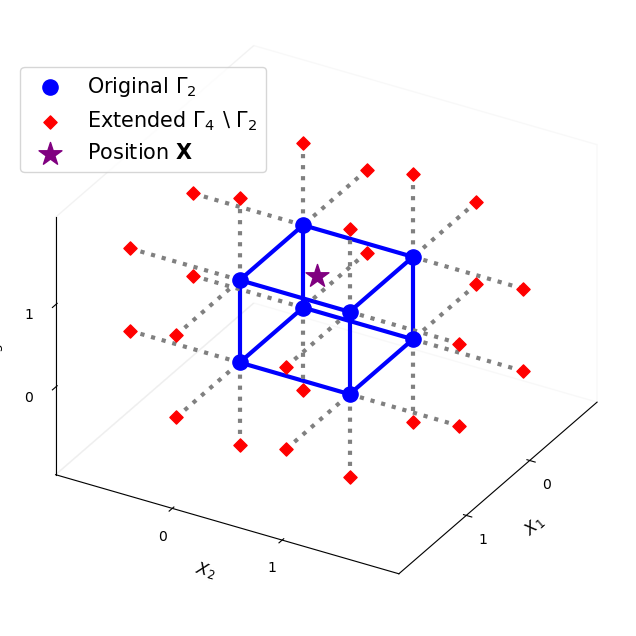

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from itertools import product, combinations

# 创建3D画布
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d', proj_type='ortho')

# 生成单位立方体顶点 (蓝色圆点)
unit_vertices = np.array(list(product([0,1], repeat=3)))
ax.scatter(unit_vertices[:,0], unit_vertices[:,1], unit_vertices[:,2], 
           s=120, color='blue', depthshade=False, label='Original $\Gamma_2$')

# 绘制立方体边线
for y, z in product([0, 1], repeat=2):
    ax.plot([0, 1], [y, y], [z, z], color='b', lw=3)
for x, z in product([0, 1], repeat=2):
    ax.plot([x, x], [0, 1], [z, z], color='b', lw=3)
for x, y in product([0, 1], repeat=2):
    ax.plot([x, x], [y, y], [0, 1], color='b', lw=3)

# 生成扩展顶点 (红色方块)
ext_vertices = []
for axis in range(3):
    for offset in [-1, 2]:
        other_axes = list(product([0,1], repeat=2))
        for pair in other_axes:
            coord = list(pair[:axis]) + [offset] + list(pair[axis:])
            ext_vertices.append(coord)
ext_vertices = np.array(ext_vertices)

# 绘制扩展顶点连接线
for ev in ext_vertices:
    nearest = np.clip(ev, 0, 1)
    ax.plot([ev[0], nearest[0]], [ev[1], nearest[1]], [ev[2], nearest[2]],
            linestyle=':', linewidth=3, color='gray')

# 绘制扩展顶点
ax.scatter(ext_vertices[:,0], ext_vertices[:,1], ext_vertices[:,2],
           s=45, color='red', marker='D', depthshade=False, label='Extended $\Gamma_4 \setminus \Gamma_2$')

# 添加紫色特殊点 (星星和X)
ax.scatter([0.3], [0.3], [0.7], color='purple', marker='*', s=300,
           depthshade=False, label='Position $\mathbf{X}$')
#ax.text(0.3, 0.4, 0.4, r'$\mathbf{X}$', color='purple',
        #fontsize=16, ha='center', va='bottom')

# 坐标轴设置
ax.set_xlim(-1, 2)
ax.set_ylim(-1, 2)
ax.set_zlim(-1, 2)
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_zticks([0, 1])
ax.set_xlabel(r'$X_1$', fontsize=12)
ax.set_ylabel(r'$X_2$', fontsize=12)
ax.set_zlabel(r'$X_3$', fontsize=12)

# 隐藏网格和调整边距
ax.grid(False)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# 添加图例
ax.legend(loc='upper left', fontsize=15, bbox_to_anchor=(0.00, 0.925))

# 设置视角
ax.view_init(elev=30, azim=30)

# 保存为EPS
plt.savefig('extended_vertices.eps', format='eps', dpi=300,
           bbox_inches='tight', pad_inches=0.01)
plt.show()
plt.close()